In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk    

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/

/content/drive


In [7]:
cd MyDrive/

/content/drive/MyDrive


In [10]:
##reading dataset
df = pd.read_csv('Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [12]:
### add some columns for upvote metrics
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [14]:
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [15]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [16]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [18]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  Helpful %
Score %upvote                             ...                            
1     Empty      8060       8060    8060  ...     8060    8060       8060
      0-20%      2338       2338    2338  ...     2338    2338       2338
      20-40%     4649       4649    4649  ...     4649    4649       4649
      40-60%     6586       6586    6586  ...     6586    6586       6586
      60-80%     5838       5838    5838  ...     5838    5838       5838
      80-100%   12531      12531   12531  ...    12531   12531      12531
2     Empty      4234       4234    4234  ...     4234    4234       4234
      0-20%       762        762     762  ...      737     762        762
      20-40%     1618       1618    1618  ...     1618    1618       1618
      40-60%     3051       3051    3051  ...     3051    3051       3051
      60-80%     2486       2486    2486  ...     2486    2486       2486
      80-100%    7014       7014    7014  ...     7014    7014       7014
3     Empty      5062       5062    5062  ...     5062    5062       5062
      0-20%       474        474     474  ...      474     474        474
      20-40%     1506       1506    1506  ...     1506    1506       1506
      40-60%     3384       3384    3384  ...     3384    3384       3384
      60-80%     2754       2754    2754  ...     2754    2754       2754
      80-100%   11037      11037   11037  ...    11036   11037      11037
4     Empty      4780       4780    4780  ...     4780    4780       4780
      0-20%       116        116     116  ...      116     116        116
      20-40%      909        909     909  ...      909     909        909
      40-60%     3185       3185    3185  ...     3185    3185       3185
      60-80%     2941       2941    2941  ...     2941    2941       2941
      80-100%   26707      26707   26707  ...    26707   26707      26707
5     Empty     11638      11638   11638  ...    11638   11638      11638
      0-20%       432        432     432  ...      432     432        432
      20-40%     2275       2275    2275  ...     2275    2275       2275
      40-60%    10312      10312   10312  ...    10312   10312      10312
      60-80%    11060      11060   11060  ...    11060   11060      11060
      80-100%  140661     140661  140661  ...   140661  140661     140661

[30 rows x 10 columns]

In [19]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [20]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [21]:
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

Text(0.5, 1.0, 'How helpful users find among user scores')

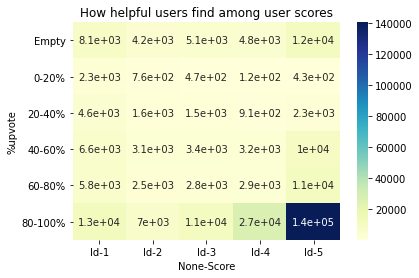

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [23]:
df.shape

(568454, 12)

In [24]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [25]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [26]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [28]:
##takes almost 2 mins to execute
X_c = c.fit_transform(X)

In [29]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [31]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [32]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9363503583002419


In [33]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [34]:
coef = ml.coef_.tolist()[0]
coef

[-0.26426744330186597,
 0.1305315541477278,
 0.36145140590062114,
 0.0,
 -0.011943901397501542,
 -0.010917370778923598,
 0.0002853359495241149,
 -0.026427142527026447,
 0.0005579846439359271,
 0.0,
 0.0014634932385895877,
 -0.013408627788897377,
 0.0018018258986210456,
 0.011744916324605744,
 -0.21843267654129628,
 0.004121959436670045,
 0.0028680145829696976,
 0.003050905949441318,
 0.0006576985802538389,
 3.584971102403929e-05,
 0.1194322744801852,
 0.016275285219722116,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 0.04917274771217883,
 -0.0003168210754131111,
 0.05679175503885641,
 0.0001289951804505067,
 -0.11218517562375704,
 -0.0005305476494176951,
 0.00014827106142129514,
 0.0,
 0.11685546012928759,
 2.2434490692354658e-05,
 -0.11304968925610022,
 0.01141215288020424,
 0.0,
 0.0035201610804209012,
 -0.0909374926421943,
 8.09862970932599e-05,
 0.0104

In [35]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.264267
1,000,0.130532
2,0000,0.361451
3,000001,0.000000
4,00001,-0.011944
...,...,...
114964,çaykur,0.000851
114965,çelem,0.000000
114966,être,0.022134
114967,île,0.000000


In [36]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.906268
39072,downside,3.450493
94667,skeptical,3.019670
5865,addicting,3.001716
39214,drawback,2.769279
...,...,...
106852,unacceptable,-3.153144
113164,worst,-3.319347
67898,mediocre,-3.351778
34989,deceptive,-3.479385


In [37]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
       Word  Coefficient
 pleasantly     3.906268
   downside     3.450493
  skeptical     3.019670
  addicting     3.001716
   drawback     2.769279
   terrific     2.473628
     hooked     2.465053
   hesitant     2.464015
     delish     2.420170
  delighted     2.356959
    worries     2.341952
   soothing     2.307968
    welcome     2.292019
     resist     2.226003
    trainer     2.220323
  excellent     2.140530
       calm     2.115392
 economical     2.097096
    easiest     2.094361
   grateful     2.061485


-Top 20 negative-
           Word  Coefficient
          blech    -2.454555
        glowing    -2.459007
       canceled    -2.488925
     overpowers    -2.500591
     unbearable    -2.527559
 disappointment    -2.550512
         lacked    -2.796246
          lousy    -2.810258
        defeats    -2.811185
     returnable    -2.873430
         ripoff    -2.946368
    disapointed    -2.949849
    embarrassed    -3.102446
      cancelled    -3.113399
  

In [49]:
### create a function 

def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [51]:

text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.937514263544662


-Top 20 positive-
       Word  Coefficient
 pleasantly     4.082686
   downside     3.499713
  addicting     3.183203
  skeptical     2.716114
    worries     2.558465
     hooked     2.500204
     solved     2.474076
     delish     2.346818
       whim     2.302250
      saves     2.299840
    welcome     2.285637
    trainer     2.266605
  delighted     2.265984
     intend     2.246883
 economical     2.199391
     resist     2.195913
   terrific     2.182524
   hesitant     2.157246
   drawback     2.119810
  excellent     2.119449


-Top 20 negative-
           Word  Coefficient
         bummer    -2.448012
 disappointment    -2.525796
        defeats    -2.532678
         lacked    -2.542498
          blech    -2.553124
     overpowers    -2.557114
         ruined    -2.582305
        sounded    -2.661089
          lousy    -2.695699
    disapointed    -2.941154
    embarrassed    -

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [54]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14876   2792]
 [  5513 108273]]
0.9368220061770658


In [55]:
from sklearn.dummy import DummyClassifier

In [56]:
c=CountVectorizer()

In [57]:
text_fit(X, y, c, DummyClassifier(),0)

features: 115282
 train records: 394360
 test records: 131454
Model Accuracy: 0.7365161957795122


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9354983492324311


-Top 20 positive-
       Word  Coefficient
      great    13.890148
  delicious    12.388225
       best    11.763171
    perfect    10.429996
      loves     9.664747
  excellent     9.359140
     highly     8.992522
       love     8.463623
  wonderful     8.346907
    amazing     7.909618
    awesome     7.675775
       good     7.580559
   favorite     7.151997
    pleased     7.007203
 pleasantly     6.995349
      yummy     6.990462
     hooked     6.966055
       nice     6.938849
       glad     6.625546
     smooth     6.601978


-Top 20 negative-
           Word  Coefficient
          hopes    -5.706249
          sorry    -5.772187
    undrinkable    -5.963137
          stale    -6.056307
           yuck    -6.306870
          worse    -6.320386
          bland    -6.363079
           weak    -6.428717
     disgusting    -6.574938
      tasteless    -6.575046
         return    

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14478   2277]
 [  6347 108352]]
0.9343953017785689


In [60]:
data = df[df['Score'] == 5]

In [61]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [62]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [63]:
X = data2['Text']

In [64]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [65]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tf=TfidfVectorizer()

In [68]:
X_c=tf.fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [70]:
y_test.value_counts()

1.0    45522
0.0      807
Name: %upvote, dtype: int64

In [71]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [72]:
os =  RandomOverSampler()

In [73]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [74]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [75]:
from collections import Counter

In [76]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_class=LogisticRegression()

In [79]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [80]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [83]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [84]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  807     0]
 [  699 44823]]
0.9849122579809623
